In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt
from sklearn.metrics import root_mean_squared_error
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [14]:
mp = pd.read_csv('monthly-milk-production-pounds-p.csv')
y = mp['Milk']

In [15]:
y_train = y[:156]
y_test = y[156:]
y_train.shape, y_test.shape

((156,), (12,))

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

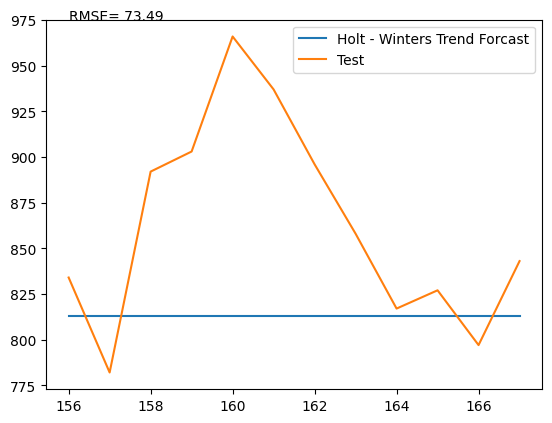

In [29]:

holt_winters = ExponentialSmoothing(y_train)
fit = holt_winters.fit()
fcast = fit.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast, index= y_test.index)

plt.plot(holt_winters_fcast, label = 'Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.legend(loc = 'best')
plt.show()

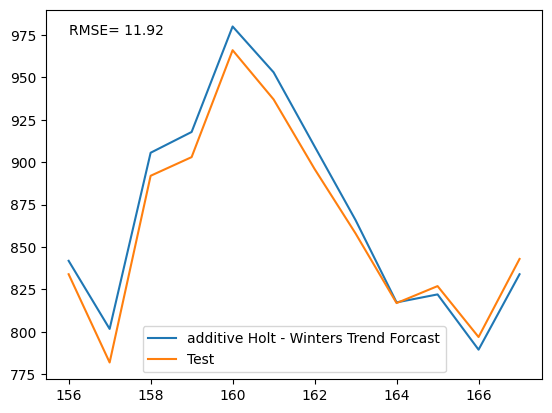

In [31]:
# Add HW 
holt_winters = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add')
fit4 = holt_winters.fit()
fcast4 = fit4.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast4, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'additive Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

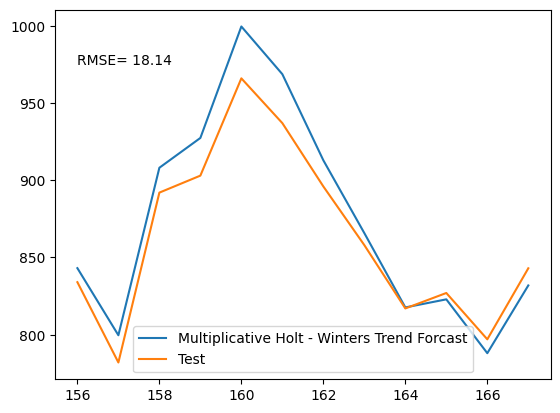

In [34]:
# Mul HW
holt_winters_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul')
fit5 = holt_winters_mul.fit()
fcast5 = fit5.forecast(len(y_test))

holt_winters_fcast = pd.Series(fcast5, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_winters_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(holt_winters_fcast, label = 'Multiplicative Holt - Winters Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

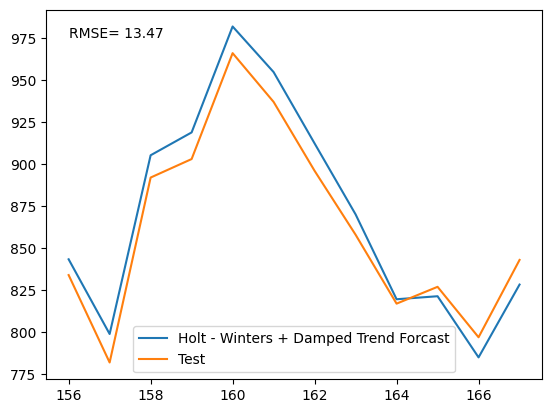

In [37]:
# Damp + HW + Add
alpha, beta, gamma = 0.2, 0.05, 0.4
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add',damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

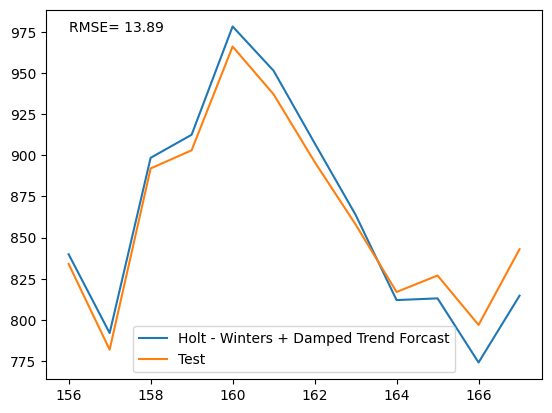

In [52]:
# Damp + HW + mul
alpha, beta, gamma = 0.2, 0.5, 0.3
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul', damped_trend=True)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))

damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(156, 975, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

# Resampling the series as yearly

In [141]:
mp = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)

<Axes: xlabel='Month'>

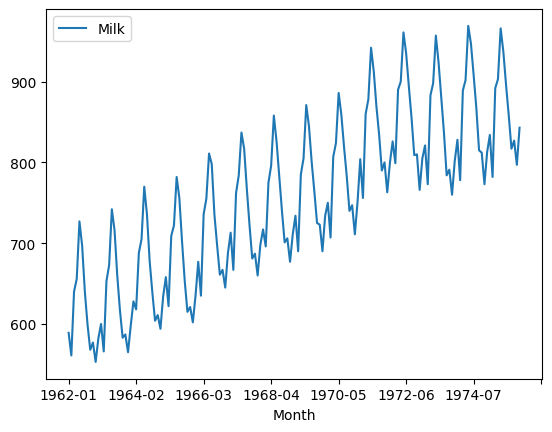

In [203]:
mp.plot()

<Axes: xlabel='Month'>

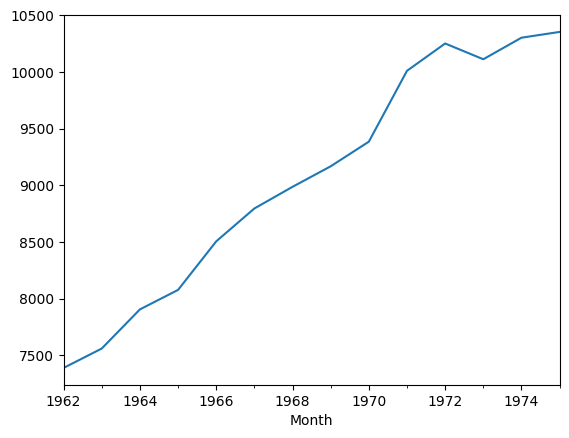

In [142]:
y.index = pd.DatetimeIndex(y.index)
y = y.resample('YE').sum()
y.plot()

In [143]:
y_train = y[:-3]
y_test = y[-3:]
y_train.shape, y_test.shape

((11,), (3,))

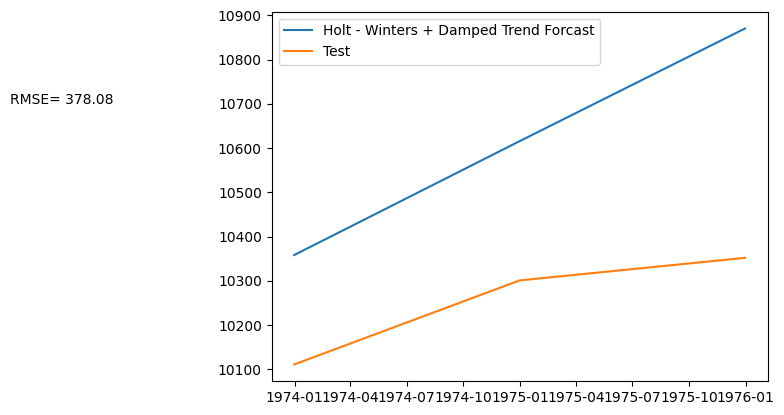

In [172]:
# Damp + HW + mul
alpha, beta, gamma = 0.05, 0.06, 0.3
damp_HW = ExponentialSmoothing(y_train,seasonal_periods=12, trend='add', damped_trend=True)
fit = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast = fit.forecast(len(y_test))


damp_HW_fcast = pd.Series(fcast, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1000, 10700, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

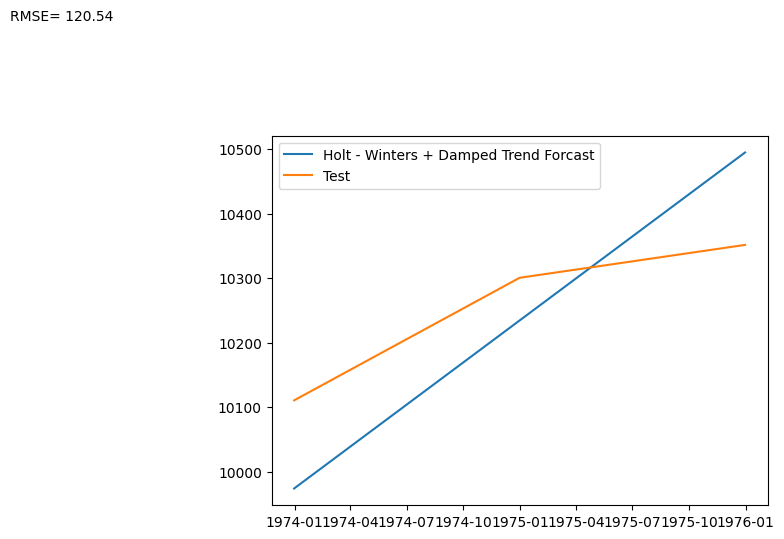

In [199]:
# Damp + HW + mul
alpha, beta, phi  = 0.1, 0.33, 0.9999999999999
damp_HW = Holt(y_train, damped_trend=True)
fit = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
fcast = fit.forecast(len(y_test))


damp_HW_fcast = pd.Series(fcast, index= y_test.index)
error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.text(1000, 10700, 'RMSE= '+str(error))
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [200]:
damp_HW.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.33,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9999999999999,
 'initial_level': 7389.0,
 'initial_trend': 171.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}